In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

In [ ]:
!git clone https://github.com/HeshamAsem/TF_Files.git

Cloning into 'TF_Files'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 130 (delta 5), reused 20 (delta 3), pack-reused 107
Receiving objects: 100% (130/130), 47.77 MiB | 32.81 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [ ]:
# Here i want to unrar the cat rar and give him the path of [cat.rar]
!pip install pyunpack                
!pip install patool
from pyunpack import Archive
Archive('TF_Files/3.2_Keras_Examples/PetImages/cat.rar').extractall('TF_Files/3.2_Keras_Examples/PetImages')


     |████████████████████████████████| 77 kB 3.2 MB/s 


In [ ]:
# Here i want to unrar the dog rar and give him the path of [dog.rar]
from pyunpack import Archive
Archive('TF_Files/3.2_Keras_Examples/PetImages/dog.rar').extractall('TF_Files/3.2_Keras_Examples/PetImages')

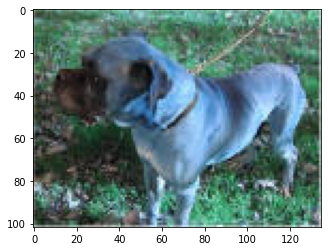

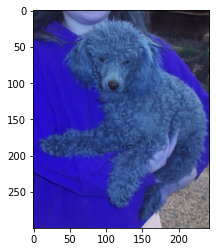

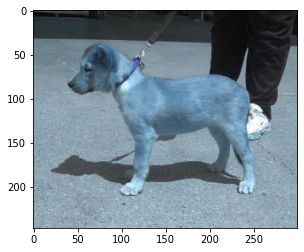

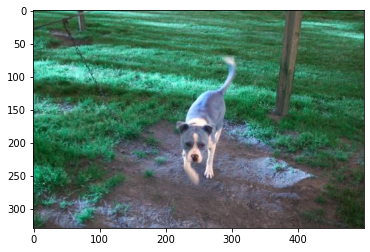

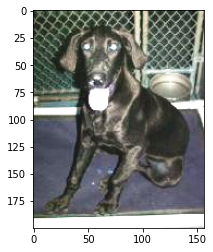

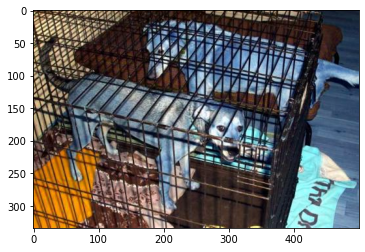

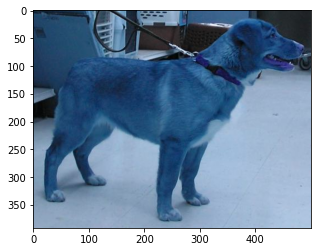

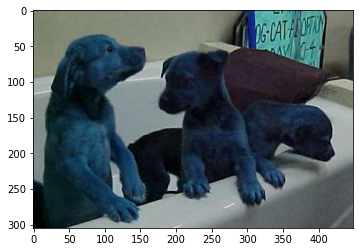

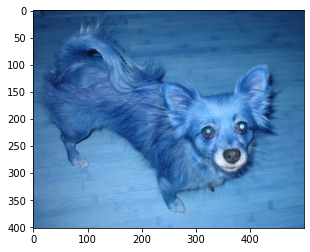

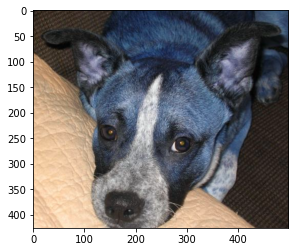

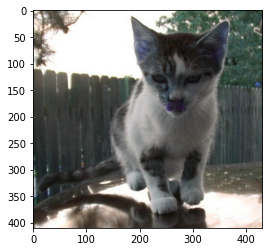

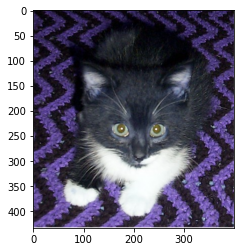

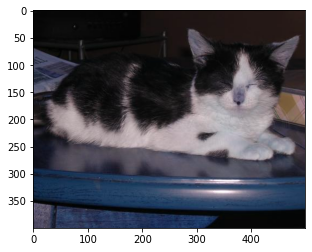

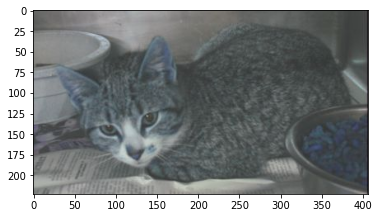

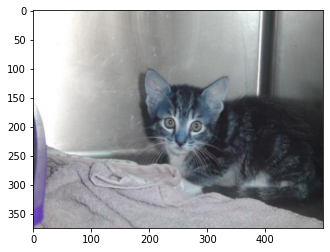

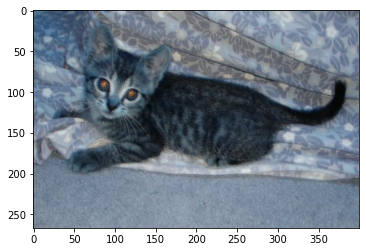

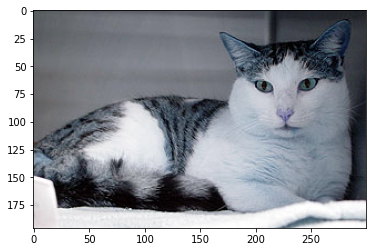

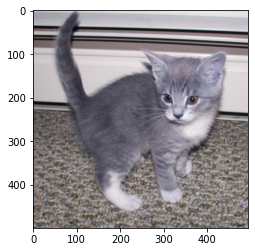

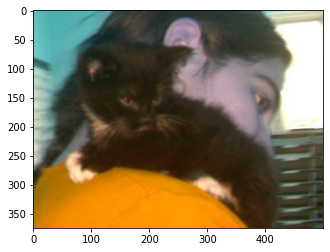

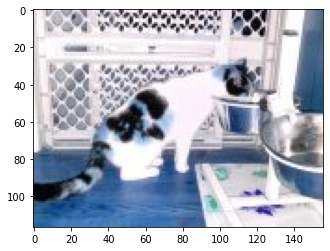

In [ ]:
# DATADIR = 'D:\\ITI\Phase 2\\1- ML Courses Online\\1- Hesham Assem\\11- TensorFlow & Keras\\Codes & Files\\3.2_Keras_Examples\\PetImages'
DATADIR = 'TF_Files/3.2_Keras_Examples/PetImages'
CATEGORIES = ["dog", "cat"]
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats --> will open dog file & cat file
    x=0
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        x+=1
        img_array = cv2.imread(os.path.join(path,img))     # to convert all imgs(dogs & cats) to arrays.
        plt.imshow(img_array)    # graph it                        
        plt.show()    # display!
        if x==10 : 
            break           #  x==10 --> will print only 10 images from each category then stoped.

In [ ]:
print(img_array)         # this is the array of the last image he read it in forloop which shape is (375, 400)
print(img_array.shape)

[[[215 204 206]
  [240 229 231]
  [251 240 242]
  ...
  [ 91 115 143]
  [ 86 110 138]
  [ 81 108 135]]

 [[216 205 207]
  [236 225 227]
  [255 247 249]
  ...
  [ 94 116 144]
  [ 87 111 139]
  [ 83 110 137]]

 [[219 208 210]
  [225 214 216]
  [251 243 244]
  ...
  [ 92 115 141]
  [ 85 110 136]
  [ 83 108 134]]

 ...

 [[ 52 107 164]
  [ 49 104 161]
  [ 46 100 160]
  ...
  [244 238 239]
  [243 237 238]
  [238 232 233]]

 [[ 47 102 159]
  [ 43 100 156]
  [ 40  96 155]
  ...
  [241 235 236]
  [243 237 238]
  [241 235 236]]

 [[ 48 105 161]
  [ 43 102 158]
  [ 39  97 156]
  ...
  [238 232 233]
  [241 235 236]
  [241 235 236]]]
(117, 156, 3)


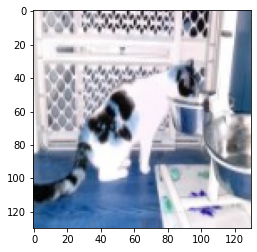

In [ ]:
# احنا لو جينا بصينا علي الصور هنلاقي ابعادهم مش زي بعض كل صوره ليها بعد غير التاني وده غلط والموديل مش هيرن كدا فلازم اخلي الابعاد بتاعت كل الصور زي بعض بالظبط 
# ForLoop انا هنا هجرب علي صوره واحده اللي هي اخر صوره طلعت من ال
# كل ما اصغر حجم الصوره فالصوره هتبكسل ومش هتبان ودقه الموديل هتبقي قليله ولكن الموديل هيبقي اسرع
# وكل ما اكبر حجم الصوره فالصوره هتوضح اكتر ودقه الموديل هتبقي اعلي ولكن الموديل هيبقي ابطئ بكتير
# هنا هجرب اني اخليها 50 * 50

IMG_SIZE = 130

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
# [training_data] اللي اسمها list بتاعت كل واحده فيهم في ال array انا هنا بقي هقرأ كل الصور الكلاب والقطط وهخلي حجمهم كلهم 100*100 وبعد كده هرجع ال

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img))  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           
        
create_training_data()

print(len(training_data))

100%|██████████| 500/500 [00:01<00:00, 364.20it/s]

999


In [ ]:
# must shuffle dogs & cats before make train:
import random
random.shuffle(training_data)
for sample in training_data[:10]:        # then to be sure if it make shuffle or no?
    print(sample[1])                     # 0=dog 1=cat

0
0
0
0
0
0
0
0
1
1


In [ ]:
X = []
y = []

for features,label in training_data:                 # بتاعها يعني هي تبع الكلاب 0 ولا القطط 1 label ال [y] المصفوفه بتاعت الصوره وهضيف في مصفوفه ال [x] وهضيف في مصفوفه ال [x & y] بعمل مصفوفتين 
    X.append(features)
    y.append(label)

print('shape of X: ', len(X))
print('shape of y: ', len(y))

shape of X:  999
shape of y:  999


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# # must convert [x_train] & [y_train] & [X_test] & [y_test] & [X_pred_array] to numpy array before train model.
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f' X_train shape is:  {X_train.shape} ')
print(f' y_train shape is:  {y_train.shape} ')
print(f' X_test  shape is:  {X_test.shape} ')
print(f' y_test  shape is:  {y_test.shape} ')

 X_train shape is:  (799, 130, 130, 3) 
 y_train shape is:  (799,) 
 X_test  shape is:  (200, 130, 130, 3) 
 y_test  shape is:  (200,) 


In [ ]:
# model = keras.models.Sequential([
#         keras.layers.Conv2D(200, kernel_size=(3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
#         keras.layers.BatchNormalization(),
#         keras.layers.Conv2D(150, kernel_size=(3,3), activation='relu'),
# #         keras.layers.BatchNormalization(),
#         keras.layers.MaxPool2D(4,4),
        
#         # keras.layers.Conv2D(80, kernel_size=(3,3), activation='relu'), 
#         # # keras.layers.BatchNormalization(),
#         keras.layers.Conv2D(50, kernel_size=(3,3), activation='relu'),
#         keras.layers.MaxPool2D(4,4),
    
#         keras.layers.Flatten() ,    
#         keras.layers.Dense(128, activation='relu') ,    
#         keras.layers.Dense(100, activation='relu') ,    
#         keras.layers.Dense(50, activation='relu') ,        
#         keras.layers.Dropout(rate= 0.5) ,            
#         keras.layers.Dense(2, activation='softmax')   
#         ])

In [ ]:
model= keras.models.Sequential([ 
                                Conv2D(32, kernel_size= (5,5), strides= (1,1), padding= 'valid', activation= 'relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
                                BatchNormalization(),
                                MaxPool2D(pool_size= (2,2), strides= (2,2)),
                                Dropout(0.2),
                                
                                Conv2D(64, (5,5), activation= 'relu'),
                                MaxPool2D(pool_size= (2,2)),
                                Dropout(0.4),
                                
                                Flatten(),  
                                Dense(128, activation = 'relu'),
                                Dense(100, activation = 'relu'),
                                Dense(50, activation = 'relu'),
                                Dense(2, activation = 'softmax')
                               ])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 59, 59, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None,

In [ ]:
model.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 4s 61ms/step - loss: 4.5561 - accuracy: 0.5319
Epoch 2/25
25/25 [==============================] - 1s 42ms/step - loss: 0.7565 - accuracy: 0.6158
Epoch 3/25
25/25 [==============================] - 1s 41ms/step - loss: 0.5941 - accuracy: 0.6896
Epoch 4/25
25/25 [==============================] - 1s 42ms/step - loss: 0.5394 - accuracy: 0.7284
Epoch 5/25
25/25 [==============================] - 1s 42ms/step - loss: 0.4597 - accuracy: 0.7760
Epoch 6/25
25/25 [==============================] - 1s 41ms/step - loss: 0.3617 - accuracy: 0.8423
Epoch 7/25
25/25 [==============================] - 1s 42ms/step - loss: 0.3191 - accuracy: 0.8673
Epoch 8/25
25/25 [==============================] - 1s 43ms/step - loss: 0.2621 - accuracy: 0.8824
Epoch 9/25
25/25 [==============================] - 1s 42ms/step - loss: 0.2065 - accuracy: 0.9124
Epoch 10/25
25/25 [==============================] - 1s 43ms/step - loss: 0.2760 - accuracy: 0.8736
Epoch 11/

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test Loss Function: ', test_loss)
print('Test accuracy: ', test_acc)

7/7 [==============================] - 0s 26ms/step - loss: 2.5971 - accuracy: 0.6650
Test Loss Function:  2.597055673599243
Test accuracy:  0.6650000214576721


In [ ]:
prediction = model.predict(X_test)        # والكلاس اللي عنده واحد يبقي ده الكلاس اللي بتنتمي ليه الصوره دي classes ومع كل صوره هيرجعلي مصفوفه بكل ال test هيرجعلي ال 1000 صوره اللي كنت بعمل عليهم 
prediction

array([[9.99992132e-01, 7.81316703e-06],
       [1.31323482e-04, 9.99868631e-01],
       [6.36579692e-01, 3.63420248e-01],
       [6.58021271e-02, 9.34197843e-01],
       [3.32299918e-02, 9.66769993e-01],
       [2.11492437e-03, 9.97885048e-01],
       [2.02424210e-02, 9.79757607e-01],
       [7.97755793e-02, 9.20224488e-01],
       [9.99984980e-01, 1.49804528e-05],
       [1.00000000e+00, 1.56395974e-13],
       [1.48663457e-04, 9.99851346e-01],
       [7.04603568e-02, 9.29539621e-01],
       [1.42578548e-03, 9.98574257e-01],
       [9.99976039e-01, 2.39228029e-05],
       [9.30898095e-05, 9.99906898e-01],
       [1.00000000e+00, 1.20815202e-09],
       [7.47228384e-01, 2.52771586e-01],
       [4.38377321e-01, 5.61622739e-01],
       [2.44747171e-05, 9.99975562e-01],
       [9.99770463e-01, 2.29489189e-04],
       [8.45074712e-04, 9.99154925e-01],
       [1.36369854e-04, 9.99863625e-01],
       [7.73918271e-01, 2.26081699e-01],
       [8.09073746e-02, 9.19092596e-01],
       [7.415808

In [ ]:
prediction.shape

(200, 2)

In [ ]:
prediction[7]     # will print output of image number 8, class which in it 1 is the desired class for this image
                  # will follow the class number 1

array([0.07977558, 0.9202245 ], dtype=float32)

In [ ]:
import numpy as np
print( np.argmax(prediction[7]) ) 
print(y_test[7])

1
1


In [ ]:
CATEGORIES[1]

'cat'

<function matplotlib.pyplot.show>

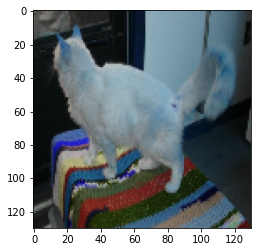

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_test[7], cmap= 'gray') 
plt.show